In [1]:
import numpy as np
from matplotlib import pyplot as plt

## what is the correct normalisation for this KDE problem?

In [2]:
def epa_kernel(x, sigma):
    return np.where((x/sigma)**2 > 1, 0,
                    (1 - (x/sigma)**2)*3/(4*sigma))

def epa_kernel_lognorm(x, x_0, sigma):
    norm = x_0 * (4*sigma*np.cosh(sigma) - 4*np.sinh(sigma))/sigma**2
    return np.where(np.abs(np.log(x/x_0)) > sigma, 0,
                    (1 - (np.log(x/x_0)/sigma)**2)/norm)

In [3]:
x_target = np.linspace(0.1, 10, 201)

In [43]:
x_example = np.array([[3.2]])

In [48]:
lin_weights = epa_kernel(x_target - x_example, 1)
lin_out = (lin_weights).sum(axis=0)

In [49]:
log_weights = epa_kernel(np.log(x_target/x_example), 1)
log_no_norm = (log_weights).sum(axis=0)
log_out = (log_weights / x_target).sum(axis=0)
second_log_out = (log_weights / x_example).sum(axis=0)

In [50]:
epa_log_weights = epa_kernel_lognorm(x_target, x_example, 0.5)
third_log_out = (epa_log_weights).sum(axis=0)

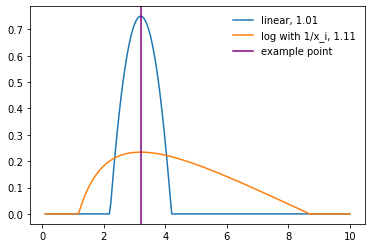

In [51]:
plt.plot(x_target, lin_out, label=f'linear, {lin_out.mean()*10:.3g}')
# plt.plot(x_target, log_no_norm, label=f'log no norm, {log_no_norm.mean()*10:.3g}')
# plt.plot(x_target, log_out, label=f'log with 1/x_target, {log_out.mean()*10:.3g}')
plt.plot(x_target, second_log_out, label=f'log with 1/x_i, {second_log_out.mean()*10:.3g}')
# plt.plot(x_target, third_log_out, label=f'log with proper norm, {third_log_out.mean()*10:.3g}')
plt.axvline(x_example, color='purple', label='example point')
plt.legend(frameon=False)

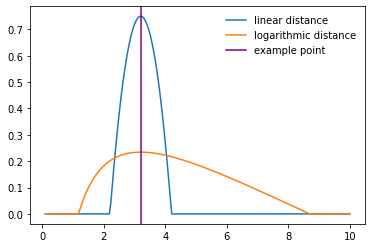

In [52]:
plt.plot(x_target, lin_out, label=f'linear distance')
# plt.plot(x_target, log_no_norm, label=f'log no norm, {log_no_norm.mean()*10:.3g}')
# plt.plot(x_target, log_out, label=f'log with 1/x_target, {log_out.mean()*10:.3g}')
plt.plot(x_target, second_log_out, label=f'logarithmic distance')
# plt.plot(x_target, third_log_out, label=f'log with proper norm, {third_log_out.mean()*10:.3g}')
plt.axvline(x_example, color='purple', label='example point')
plt.legend(frameon=False)

In [ ]:
plt.plot(x_target, lin_out, label=f'linear, {lin_out.mean()*10:.3g}')
plt.plot(x_target, log_no_norm, label=f'log no norm, {log_no_norm.mean()*10:.3g}')
plt.plot(x_target, log_out, label=f'log with 1/x_target, {log_out.mean()*10:.3g}')
plt.plot(x_target, second_log_out, label=f'log with 1/x_i, {second_log_out.mean()*10:.3g}')
# plt.plot(x_target, third_log_out, label=f'log with proper norm, {third_log_out.mean()*10:.3g}')
plt.axvline(x_example, color='purple', label='example point')
plt.legend(frameon=False)

In [45]:
x = np.random.uniform(0.1, 10, 100000).reshape(-1, 1)
x_target = np.linspace(0.1, 10, 201)

In [46]:
weights = (2*x**0.5 + np.where(x<2, (x - 2)**2, 0))

In [48]:
lin_weights = epa_kernel(x_target - x, 0.5)
lin_out = (lin_weights * weights).sum(axis=0)

In [53]:
log_weights = epa_kernel(np.log(x_target/x), 0.8)
log_out = (log_weights * weights/ x_target).sum(axis=0)
second_log_out = (log_weights * weights/ x).sum(axis=0)

In [56]:
epa_log_weights = epa_kernel_lognorm(x_target, x, 0.8)
third_log_out = (epa_log_weights * weights).sum(axis=0)

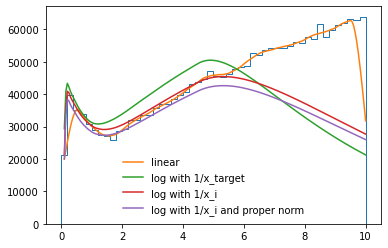

In [57]:
bin_size = 10/50
plt.hist(x, weights=weights.flatten()/bin_size, range=(0, 10), bins=50, histtype='step')
plt.plot(x_target, lin_out, label='linear')
plt.plot(x_target, log_out, label=f'log with 1/x_target')
plt.plot(x_target, second_log_out, label=f'log with 1/x_i')
plt.plot(x_target, third_log_out, label=f'log with 1/x_i and proper norm')
plt.legend(frameon=False)

In [58]:
x = np.random.uniform(1, 26, 100000).reshape(-1, 1)
x_target = np.linspace(1, 26, 201)

In [59]:
# weights = (2*x**0.5 + np.where(x<2, (x - 2)**2, 0))

In [60]:
weights = 2*np.exp(-(x-10)**2/15) + 3*np.exp(-(x-15)**2/8)

In [61]:
lin_weights = epa_kernel(x_target - x, 0.5)
lin_out = (lin_weights * weights).sum(axis=0)

In [83]:
log_weights = epa_kernel(np.log(x_target/x), 0.3)
log_out = (log_weights * weights/ x_target).sum(axis=0)
second_log_out = (log_weights * weights/ x).sum(axis=0)

In [84]:
epa_log_weights = epa_kernel_lognorm(x_target, x, 0.3)
third_log_out = (epa_log_weights * weights).sum(axis=0)

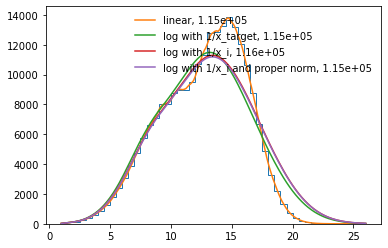

In [85]:
bin_size = 25/50
content = plt.hist(x, weights=weights.flatten()/bin_size, range=(1, 26), bins=50, histtype='step')
plt.plot(x_target, lin_out, label=f'linear, {lin_out.mean()*25:.3g}')
plt.plot(x_target, log_out, label=f'log with 1/x_target, {log_out.mean()*25:.3g}')
plt.plot(x_target, second_log_out, label=f'log with 1/x_i, {second_log_out.mean()*25:.3g}')
plt.plot(x_target, third_log_out, label=f'log with 1/x_i and proper norm, {third_log_out.mean()*25:.3g}')
plt.legend(frameon=False)